# Durée d'exécution
Voici une façon de mesurer la durée d'exécution des programmes.

### time

time() fournit le nombre de secondes écoulées deuis le 1er janvier 1970

Le 1er janvier 2021, la durée était de 51 ans, soit environ 51×365.25×86400 =1 609 437 600

secondes.

Aujourd'hui, le 27 janvier 2021; time() donne environ 1 611 767 583 : ça semble corrrect.

In [1]:
import time
time.time()

1611767583.2637951

In [7]:
import time

instant_debut = time.time()

# le programme

duree = time.time() - instant_debut
print("Temps d'execution : ", duree, "secondes")

Temps d'execution :  4.673004150390625e-05 secondes


## Un exemple : puissance $n$ d'un nombre

In [13]:
def puissance_n(x,n):
    # retourne x à la puissance n
    p = 1
    for i in range(n):
        p = x*p
    return p


puissance_n(2,10)

1024

In [14]:
import time

instant_debut = time.time()

puissance_n(10,200000)

duree1 = time.time() - instant_debut
print("Temps d'execution : ", duree1, "secondes")

Temps d'execution :  4.013584852218628 secondes


In [15]:
def puissance_rapide(x,n):
    # retourne x à la puissance n mais plus vite
    if n == 1:
        return x
    else:
        if n%2 ==0:
            p = puissance_rapide(x,n/2)
            return p*p
        else:
            p = puissance_rapide(x,(n-1)/2)
            return p*p*x

puissance_rapide(2,10)


1024

In [16]:
import time

instant_debut = time.time()

puissance_rapide(10,200000)

duree2 = time.time() - instant_debut
print("Temps d'execution : ", duree2, "secondes")

Temps d'execution :  0.030864477157592773 secondes


In [17]:
duree1/duree2

130.03897107102856

## Deuxième exemple : évaluation d'un polynôme

$P(x)= 9x^5 + 8x^4 + 7x^3 + 6x^2 + 5x + 4$

pol1 : évaluation bête

pol 2 : évaluation par $P(x) = 4+x(5+x(6+x(7+x(8+9x))))$

In [10]:
import time

def pol1(x):
    return 9*x**5 + 8*x**4 + 7*x**3 + 6*x**2 + 5*x + 4

def pol2(x):
    return 4+x*(5+x*(6+x*(7+x*(8+9*x))))

pol1(50),pol2(50)

(2863390254, 2863390254)

In [11]:
n = 10**5

instant_debut = time.time()
for i in range(n):
    pol1(i)
duree_pol1 = time.time() - instant_debut
print("Temps d'execution  pour pol1 : ", duree_pol1, "secondes")

instant_debut = time.time()
for i in range(n):
    pol2(i)
duree_pol2 = time.time() - instant_debut
print("Temps d'execution  pour pol2 : ", duree_pol2, "secondes")

duree_pol1/duree_pol2


Temps d'execution  pour pol1 :  0.20649123191833496 secondes
Temps d'execution  pour pol2 :  0.06705093383789062 secondes


3.0796175399670025

## durée en $n^2$

In [1]:
import time 

def quadratique(n):
    s = 0
    for i in range(n):
        for j in range(n):
            s = s + 1
    return s

quadratique(10**3)

1000000

In [12]:
p = 5
y1 = []

n = [100 + 100*i for i in range(p)]

for i in n:
    instant_debut = time.time()
    quadratique(i)
    duree = time.time() - instant_debut
    y1 = y1 + [duree]
    
print(y1)

[0.0005550384521484375, 0.0021865367889404297, 0.005524158477783203, 0.01150822639465332, 0.018529653549194336]


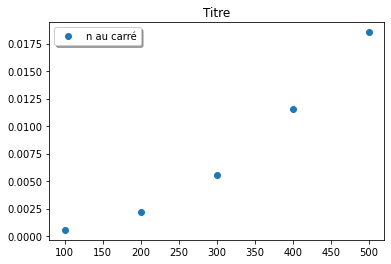

In [24]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.set_title('Titre')
line1, = ax.plot(n, y1,'o', lw=2, label='n au carré')
#plt.xscale('log')
leg = ax.legend(fancybox=True, shadow=True)

## durée en $n^3$

In [3]:
def cubique(n):
    s = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                s = s + 1
    return s

quadratique(10**2)

10000

In [14]:
p = 5
y2 = []

n = [100 + 100*i for i in range(p)]

for i in n:
    instant_debut = time.time()
    cubique(i)
    duree = time.time() - instant_debut
    y2 = y2 + [duree]
    
print(y2)

[0.06116533279418945, 0.43543267250061035, 1.6009180545806885, 4.279731512069702, 9.18059492111206]


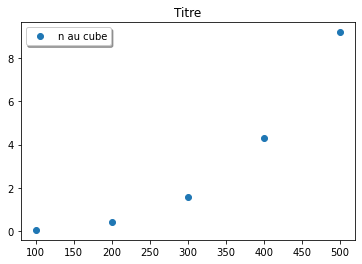

In [25]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.set_title('Titre')
line2, = ax.plot(n, y2, 'o', lw=2, label='n au cube')
#plt.xscale('log')
leg = ax.legend(fancybox=True, shadow=True)

## comparaison $n^2$ et $n^3$

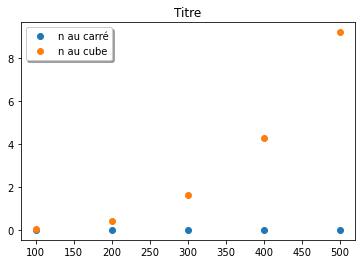

In [23]:
import matplotlib.pyplot as plt

def f12(x):
    return 8.86*10**(-8) * x**2 - 6.692*10**(-6)*x -2.06*10**(-4)
y12 = [f12(k) for k in n]

fig, ax = plt.subplots()
ax.set_title('Titre')
line1, = ax.plot(n, y1,'o', lw=2, label='n au carré')
line2, = ax.plot(n, y2, 'o', lw=2, label='n au cube')
#plt.xscale('log')
leg = ax.legend(fancybox=True, shadow=True)